In [17]:
import os 
import pandas as pd 
import numpy as np 
import pickle

In [18]:
base_folder="/bigdata/digbose92/ads_data/ads_complete_repo/ads_latest_annotations/ads_latest_annotations/ads_completed_annotation_v1/ads_annotation_pkl_files"
#"/data/digbose92/ads_complete_repo/ads_latest_annotations/ads_completed_annotation_v1/ads_annotation_pkl_files" #loactions of the pickle files containing the parsed labels
file_list=os.listdir(base_folder)
print(sorted(file_list))
#need to add set 5 data here to the list of pickle files

['Set_11_15.pkl', 'Set_16_20.pkl', 'Set_21_25.pkl', 'Set_26_30.pkl', 'Set_31_35.pkl', 'Set_36_40.pkl', 'Set_41_45.pkl', 'Set_46_50.pkl', 'Set_51_55.pkl', 'Set_56_60.pkl', 'Set_61_65.pkl', 'Set_6_10.pkl', 'Set_71_75.pkl', 'Set_76_80.pkl', 'Set_81_85.pkl', 'Set_test_ads_0.pkl', 'Set_test_ads_1.pkl']


In [32]:
#read one pickle file and check the details 
from collections import Counter
from tqdm import tqdm 

number_files=0
social_message_list=[]
transition_list=[]
start_transition_list=[] #holds majority start labels for advertisement videos
middle_transition_list=[] #holds majority middle labels for advertisement videos
end_transition_list=[]#holds majority end labels for advertisement videos

#tone for every url (majority tone)
start_tone_list=[]
middle_tone_list=[]
end_tone_list=[]
video_file_list=[]
dict_data_complete_json=dict()
key_list=['raf_bomber_command_harry\n','molto_aliens\n',
'zumosol_lips\n','zumosol_laser\n','zumosol_crab\n','gundersen_health_system_baby\n'
'interflora_time_to_forgive_her_2\n']

for file in tqdm(file_list):
    pkl_file=os.path.join(base_folder,file)
    
    with open(pkl_file,"rb") as f:
        current_split_data=pickle.load(f)
        
    number_files=number_files+len(current_split_data.keys())
    #list of keys for current split data
    key_list=sorted(list(current_split_data.keys()))
    
    for key in key_list:
        #print(current_split_data[key]['Start'])
        #url in the current key 
        #print(current_split_data[key]['Start'])
        video_file=current_split_data[key]['Url'].split("/")[-1]
        
        if(video_file in key_list):
            video_key=video_file.split("\n")[0]
            print(video_key)
        else:
            video_key=os.path.splitext(video_file)[0]
        
        video_file_list.append(video_file)
        
        #start majority tone
        start_maj_tone=current_split_data[key]['Start']['Majority_tone']
        #middle majority tone
        middle_maj_tone=current_split_data[key]['Middle']['Majority_tone']
        #ending majority tone
        end_maj_tone=current_split_data[key]['End']['Majority_tone']
        
        #start,middle,ending 
        
        dict_temp={'Start_majority_tone': start_maj_tone,
                    'Middle_majority_tone':middle_maj_tone,
                   'End_majority_tone':end_maj_tone,
                   'Start_tone':current_split_data[key]['Start']['Tone'],
                   'Middle_tone':current_split_data[key]['Middle']['Tone'],
                   'End_tone':current_split_data[key]['End']['Tone'],
                   'Start_reason':current_split_data[key]['Start']['Reason'],
                   'Middle_reason':current_split_data[key]['Middle']['Reason'],
                   'End_reason':current_split_data[key]['End']['Reason'],
                   'Social_message_majority':current_split_data[key]['Social_message']['Majority_message'],
                   'Social_message':current_split_data[key]['Social_message']['Message']
                    }
        
        start_tone_list.append(start_tone)
        middle_tone_list.append(middle_tone)
        end_tone_list.append(end_tone)
        
        if((start_tone==middle_tone) and (middle_tone==end_tone)):
            transition_list.append('No transition')
        else:
            transition_list.append('Transition')
            start_transition_list.append(start_tone)
            middle_transition_list.append(middle_tone)
            end_transition_list.append(end_tone)
        
        #extract majority social message label for every advertisement video
        social_message_list.append(current_split_data[key]['Social_message']['Majority_message'])
        dict_data_complete_json[video_key]=dict_temp

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 96.35it/s]


In [20]:
### convert the entire set of lists into dataframe ###

df=pd.DataFrame({
    'video_file': video_file_list,
    'start_tone': start_tone_list,
    'middle_tone': middle_tone_list,
    'end_tone': end_tone_list,
    'Transition_val': transition_list,
    'social_message': social_message_list
}, index=False)
df.to_csv("/data/digbose92/ads_complete_repo/ads_codes/SAIM-ADS/data/SAIM_ads_data_message_tone.csv")

TypeError: Index(...) must be called with a collection of some kind, False was passed

In [ ]:
#check distribution of social messages
Counter(social_message_list)
#7697 videos don't have any social message and 761 videos have social message

In [ ]:
#need to check the number of videos with tone transitions (as defined by majority start, middle and end annotations)
Counter(transition_list)

In [ ]:
#check the distribution of start, middle and end for cases with transitions

print(Counter(start_transition_list))
print(Counter(middle_transition_list))
print(Counter(end_transition_list))

In [ ]:
7697+761

In [ ]:
1731+1077+1068

In [ ]:
#split the csv data into 

In [ ]:
ls -ltr /data/digbose92/ads_complete_repo/ads_latest_annotations/ads_completed_annotation_v1/ads_annotation_pkl_files

In [ ]:
len(dict_data_complete_json)

In [ ]:
list(dict_data_complete_json.keys())

In [ ]:
dict_data_complete_json['park_mgm_no_ordinary_august']

In [21]:
#load the csv file 
csv_file="/bigdata/digbose92/ads_data/ads_complete_repo/ads_codes/SAIM-ADS/data/SAIM_data/SAIM_multi_task_tone_soc_message_topic_data_no_zero_files.csv"
csv_data=pd.read_csv(csv_file)
clip_feature_file_list=list(csv_data['clip_feature_path'])
clip_feature_key=[os.path.splitext(f.split("/")[-1])[0] for f in clip_feature_file_list]
dict_MM_AU_sample=dict()

In [35]:
for key in clip_feature_key:
    if(key in dict_data_complete_json):
        dict_MM_AU_sample[key]=dict_data_complete_json[key]
    else:
        select_key=key.split("\n")[0]
        dict_MM_AU_sample[select_key]=dict_data_complete_json[key+"\n"]

In [36]:
len(dict_MM_AU_sample)

8399

In [37]:
#save the dictionary dict_MM_AU_sample

In [39]:
import json
with open("/bigdata/digbose92/ads_data/ads_complete_repo/ads_latest_annotations/ads_latest_annotations/processed_json/MM_AU_dataset.json","w") as f:
    json.dump(dict_MM_AU_sample,f,indent=4)

In [42]:
# compute distribution of majority, unanimous and separate distribution

#start tone

start_two_sample_maj=0
start_complete_maj=0
start_no_maj=0

for key in list(dict_MM_AU_sample.keys()):
    
    dict_curr=dict_MM_AU_sample[key]
    start_tone=dict_curr['Start_tone']
    
    # Initialize the Counter object.
    counter = Counter(start_tone)

    # Find the element with the highest count.
    majority_element, count = counter.most_common(1)[0]
    
    #print(start_tone,majority_element,count)
    if(count==2):
        start_two_sample_maj+=1
    elif(count==3):
        start_complete_maj+=1
    elif(count==1):
        start_no_maj+=1

In [43]:
start_complete_maj,start_two_sample_maj,start_no_maj

(2610, 5044, 745)

In [44]:
#middle tone

mid_two_sample_maj=0
mid_complete_maj=0
mid_no_maj=0

for key in list(dict_MM_AU_sample.keys()):
    
    dict_curr=dict_MM_AU_sample[key]
    mid_tone=dict_curr['Middle_tone']
    
    # Initialize the Counter object.
    counter = Counter(mid_tone)

    # Find the element with the highest count.
    majority_element, count = counter.most_common(1)[0]
    
    #print(start_tone,majority_element,count)
    if(count==2):
        mid_two_sample_maj+=1
    elif(count==3):
        mid_complete_maj+=1
    elif(count==1):
        mid_no_maj+=1
        
print(mid_complete_maj,mid_two_sample_maj,mid_no_maj)

3351 4340 708


In [45]:
end_two_sample_maj=0
end_complete_maj=0
end_no_maj=0

for key in list(dict_MM_AU_sample.keys()):
    
    dict_curr=dict_MM_AU_sample[key]
    end_tone=dict_curr['End_tone']
    
    # Initialize the Counter object.
    counter = Counter(end_tone)

    # Find the element with the highest count.
    majority_element, count = counter.most_common(1)[0]
    
    #print(start_tone,majority_element,count)
    if(count==2):
        end_two_sample_maj+=1
    elif(count==3):
        end_complete_maj+=1
    elif(count==1):
        end_no_maj+=1
        
print(end_complete_maj,end_two_sample_maj,end_no_maj)

4122 3815 462


In [61]:
soc_msg_two_sample_maj=0
soc_msg_complete_maj=0
soc_msg_no_maj=0

for key in list(dict_MM_AU_sample.keys()):
    
    dict_curr=dict_MM_AU_sample[key]
    #print(dict_curr)
    soc_msg=eval(dict_curr['Social_message'])
    
    
    # Initialize the Counter object.
    counter = Counter(soc_msg)

    # Find the element with the highest count.
    majority_element, count = counter.most_common(1)[0]
    
    #print(start_tone,majority_element,count)
    if(count==2):
        soc_msg_two_sample_maj+=1
    elif(count==3):
        soc_msg_complete_maj+=1
    elif(count==1):
        print(key)
        soc_msg_no_maj+=1
        
print(soc_msg_complete_maj,soc_msg_two_sample_maj,soc_msg_no_maj)

mercedes_be_a_good_parent
6618 1780 1


In [52]:
print(dict_curr)


{'Start_majority_tone': 'positive', 'Middle_majority_tone': 'positive', 'End_majority_tone': 'positive', 'Start_tone': ['positive', 'positive', 'positive'], 'Middle_tone': ['positive', 'positive', 'positive'], 'End_tone': ['positive', 'positive', 'positive'], 'Start_reason': ['someone is dancing and three are watching', 'A woman dancing madly in front of children', 'A Women dance in front of other children'], 'Middle_reason': ['still she is dancing and everyone is watching', "There are strange looks on the children's faces", "It's time to forgive him"], 'End_reason': ['the ad promotes FLEUROP WEBSITE', 'May 14th is mothers day, so they forgive her', 'Flowers have a powerful effect'], 'Social_message_majority': 'No', 'Social_message': "['Yes', 'No', 'No']"}


In [62]:
46.4+43.3+10.3

99.99999999999999

In [63]:
social_message_yes_data=csv_data[csv_data['social_message']=='Yes']

In [64]:
social_message_yes_data.shape

(759, 11)

In [65]:
social_message_yes_data.columns

Index(['Unnamed: 0', 'video_file', 'start_tone', 'middle_tone', 'end_tone',
       'Transition_val', 'social_message', 'Topic', 'Split',
       'clip_feature_path', 'Link'],
      dtype='object')

In [69]:
mid_tone_list=Counter(list(social_message_yes_data['middle_tone']))

In [67]:
mid_tone_list

Counter({'neutral': 78, 'positive': 352, 'negative': 329})

In [70]:
start_tone_list=Counter(list(social_message_yes_data['start_tone']))
print(start_tone_list)

Counter({'positive': 352, 'negative': 245, 'neutral': 162})


In [71]:
end_tone_list=Counter(list(social_message_yes_data['end_tone']))
print(end_tone_list)

Counter({'positive': 523, 'negative': 153, 'neutral': 83})


In [72]:
Counter(list(social_message_yes_data['Transition_val']))

Counter({'Transition': 474, 'No transition': 285})

In [74]:
start_tone_reason_tot=[]
mid_tone_reason_tot=[]
end_tone_reason_tot=[]

for key in list(dict_MM_AU_sample.keys()):
    
    start_tone_reason_tot=start_tone_reason_tot+dict_MM_AU_sample[key]['Start_reason']
    mid_tone_reason_tot=mid_tone_reason_tot+dict_MM_AU_sample[key]['Middle_reason']
    end_tone_reason_tot=end_tone_reason_tot+dict_MM_AU_sample[key]['End_reason']

In [75]:
len(start_tone_reason_tot),len(mid_tone_reason_tot),len(end_tone_reason_tot)

(24983, 24974, 25013)

In [76]:
24983+24974+25013

74970

In [78]:
start_reason_len=[len(s.split) for s in start_tone_reason_tot]
mid_reason_len=[len(s) for s in mid_tone_reason_tot]
end_reason_len=[len(s) for s in end_tone_reason_tot]

In [81]:
import numpy as np


start_reason_len=[]
for s in tqdm(start_tone_reason_tot):
    start_word_list=s.split(" ")
    start_reason_len.append(len(start_word_list))

mid_reason_len=[]
for s in tqdm(mid_tone_reason_tot):
    mid_word_list=s.split(" ")
    mid_reason_len.append(len(mid_word_list))
    
end_reason_len=[]
for s in tqdm(end_tone_reason_tot):
    end_word_list=s.split(" ")
    end_reason_len.append(len(end_word_list))    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25013/25013 [00:00<00:00, 1036629.87it/s]


In [86]:
#start statistics
print(np.min(start_reason_len))
print(np.mean(start_reason_len))
print(np.std(start_reason_len))
print(np.max(start_reason_len))

print(np.min(mid_reason_len))
print(np.mean(mid_reason_len))
print(np.std(mid_reason_len))
print(np.max(mid_reason_len))

print(np.min(end_reason_len))
print(np.mean(end_reason_len))
print(np.std(end_reason_len))
print(np.max(end_reason_len))

1
7.583837009166233
5.263303500912436
79
1
7.8576519580363575
5.32583300390706
86
1
7.435173709670971
5.035301495542321
92


Ttest_indResult(statistic=-5.779349685365028, pvalue=7.543448157976759e-09)
Ttest_indResult(statistic=9.112878566169263, pvalue=8.310539520339709e-20)
Ttest_indResult(statistic=3.226885765194386, pvalue=0.0012522597006676827)


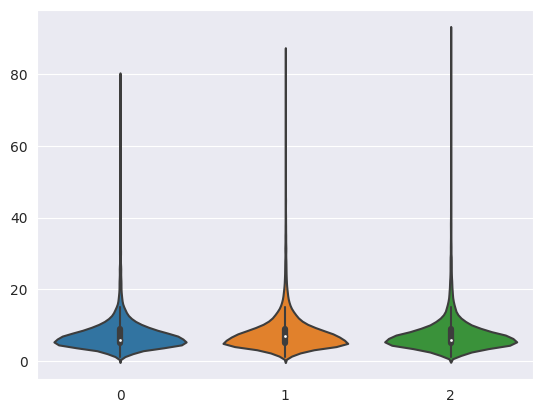

In [95]:
#box plot of the three lengths

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('darkgrid')

reason_len=[start_reason_len,mid_reason_len,end_reason_len]

sns.violinplot(reason_len)

#significantly different or not 
print(stats.ttest_ind(start_reason_len, mid_reason_len))
print(stats.ttest_ind(mid_reason_len, end_reason_len))
print(stats.ttest_ind(start_reason_len, end_reason_len))